In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
dataset = pd.read_csv("E:\\Datasets\\Regression Project\\Indian_House_Prices.csv")

In [3]:
dataset.head(5)

,Price,Area,Location,BHK,City,Latitude,Longitude
0,300.00,3340,JP Nagar Phase 1,4,Banglore,12.265594,76.646540
1,83.58,1675,Doddanekundi,3,Banglore,12.971319,77.696477
2,68.45,1670,Kengeri,3,Banglore,12.917657,77.483757
3,67.97,1220,Horamavu,2,Banglore,13.027331,77.660151
4,200.00,2502,Thanisandra,4,Banglore,13.054713,77.633926


In [4]:
dataset.shape

(9390, 7)

In [5]:
dataset.groupby("City")["City"].agg('count')

City
Banglore     1708
Chennai      2047
Delhi        1989
Hyderabad    2276
Kolkata        68
Mumbai       1302
Name: City, dtype: int64

In [6]:
dataset.isnull().sum()

Price        0
Area         0
Location     0
BHK          0
City         0
Latitude     0
Longitude    0
dtype: int64

In [7]:
dataset.isnull()

,Price,Area,Location,BHK,City,Latitude,Longitude
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
9385,False,False,False,False,False,False,False
9386,False,False,False,False,False,False,False
9387,False,False,False,False,False,False,False
9388,False,False,False,False,False,False,False


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      9390 non-null   float64
 1   Area       9390 non-null   int64  
 2   Location   9390 non-null   object 
 3   BHK        9390 non-null   int64  
 4   City       9390 non-null   object 
 5   Latitude   9390 non-null   float64
 6   Longitude  9390 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 513.6+ KB


In [9]:
dataset.describe()

,Price,Area,BHK,Latitude,Longitude
count,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000
mean,105.614563,1354.274973,2.472311,18.778749,74.315855
std,139.664066,719.154146,0.762603,7.554944,18.613870
min,20.000000,200.000000,1.000000,-28.816624,-117.147666
25%,45.000000,924.250000,2.000000,12.980165,77.036315
50%,70.000000,1200.000000,2.000000,17.451210,77.746994
75%,122.000000,1610.000000,3.000000,19.227342,79.922469
max,4000.000000,9900.000000,8.000000,65.447377,127.655678


In [10]:
dataset['Area'].unique()

array([3340, 1675, 1670, ...,  972, 2355,  687], dtype=int64)

In [11]:
new_dataset = dataset.copy()
new_dataset['Price Per Sq.ft'] = new_dataset['Price']*100000/new_dataset['Area']

In [12]:
new_dataset.head()

,Price,Area,Location,BHK,City,Latitude,Longitude,Price Per Sq.ft
0,300.00,3340,JP Nagar Phase 1,4,Banglore,12.265594,76.646540,8982.035928
1,83.58,1675,Doddanekundi,3,Banglore,12.971319,77.696477,4989.850746
2,68.45,1670,Kengeri,3,Banglore,12.917657,77.483757,4098.802395
3,67.97,1220,Horamavu,2,Banglore,13.027331,77.660151,5571.311475
4,200.00,2502,Thanisandra,4,Banglore,13.054713,77.633926,7993.605116


In [13]:
len(new_dataset.Location.unique())

741

In [14]:
new_dataset.Locationtion = new_dataset.Location.apply(lambda x : x.strip())

C:\Users\Adrija\AppData\Local\Temp/ipykernel_11932/353013872.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_dataset.Locationtion = new_dataset.Location.apply(lambda x : x.strip())


In [15]:
Location_stats = new_dataset.groupby('Location')['Location'].agg('count').sort_values(ascending = False)
Location_stats.head(100)

Location
Kharghar       322
Dwarka Mor     254
Uttam Nagar    246
Kukatpally     163
Burari         144
              ... 
Manapakkam      27
Anjanapura      27
Chromepet       27
Maduravoyal     27
Sarjapur        26
Name: Location, Length: 100, dtype: int64

In [16]:
len(Location_stats[Location_stats<=10])

529

In [17]:
Location_stats_less_than_10 = Location_stats[Location_stats<=10]
Location_stats_less_than_10

Location
Bhiwandi             10
Gandipet             10
Kengeri              10
Sector 10            10
Subramanyapura       10
                     ..
4 Bunglows            1
Marol                 1
Mansoorabad           1
Majiwada              1
west venkatapuram     1
Name: Location, Length: 529, dtype: int64

In [18]:
new_dataset.Location = new_dataset.Location.apply(lambda x : 'Others' if x in Location_stats_less_than_10 else x)

In [19]:
len(new_dataset.Location.unique())

213

In [20]:
new_dataset.head(20)

,Price,Area,Location,BHK,City,Latitude,Longitude,Price Per Sq.ft
0,300.00000,3340,Others,4,Banglore,12.265594,76.646540,8982.035928
1,83.58000,1675,Doddanekundi,3,Banglore,12.971319,77.696477,4989.850746
2,68.45000,1670,Others,3,Banglore,12.917657,77.483757,4098.802395
3,67.97000,1220,Horamavu,2,Banglore,13.027331,77.660151,5571.311475
4,200.00000,2502,Thanisandra,4,Banglore,13.054713,77.633926,7993.605116
5,71.05000,1438,Ramamurthy Nagar,3,Banglore,13.012022,77.677782,4940.890125
6,84.05000,1405,Whitefield Hope Farm Junction,3,Banglore,12.983974,77.752044,5982.206406
7,35.06000,660,Electronic City Phase 1,1,Banglore,12.849678,77.664975,5312.121212
8,77.00000,1362,Yelahanka,2,Banglore,13.100698,77.596345,5653.450808
9,93.69000,1735,Anjanapura,3,Banglore,12.684704,77.271172,5400.000000


In [21]:
new_dataset.shape

(9390, 8)

In [22]:
new_dataset[new_dataset.Area/new_dataset.BHK<300].head(20)

,Price,Area,Location,BHK,City,Latitude,Longitude,Price Per Sq.ft
1404,41.00,1055,Bommasandra,4,Banglore,12.816244,77.691611,3886.255924
2002,22.59,572,Perungalathur,2,Chennai,12.914545,80.087955,3949.300699
2076,25.00,570,Thiruverkadu,2,Chennai,13.072770,80.120459,4385.964912
2295,66.00,697,Others,3,Chennai,13.103264,80.132508,9469.153515
2306,29.82,590,Kolapakkam,2,Chennai,13.009707,80.152899,5054.237288
2310,29.82,590,Kolapakkam,2,Chennai,13.009707,80.152899,5054.237288
3758,25.00,435,Uttam Nagar,2,Delhi,28.619074,77.056686,5747.126437
3768,125.00,600,Sector 12 Dwarka,3,Delhi,28.595606,77.043038,20833.333333
3778,25.00,435,Uttam Nagar,2,Delhi,28.619074,77.056686,5747.126437
3788,125.00,600,Sector 12 Dwarka,3,Delhi,28.595606,77.043038,20833.333333


In [23]:
dataset2 = new_dataset[~(new_dataset.Area/new_dataset.BHK<300)]

In [24]:
dataset2.shape

(8893, 8)

In [25]:
dataset2['Price Per Sq.ft'].describe()

count      8893.000000
mean       7263.696749
std        5073.416618
min        2000.000000
25%        4516.666667
50%        5799.999167
75%        8356.545961
max      109950.522265
Name: Price Per Sq.ft, dtype: float64

In [26]:
dataset2['Price'].describe()

count    8893.000000
mean      109.418936
std       142.498510
min        20.000000
25%        46.670000
50%        73.170000
75%       127.000000
max      4000.000000
Name: Price, dtype: float64

Text(0, 0.5, 'Count')

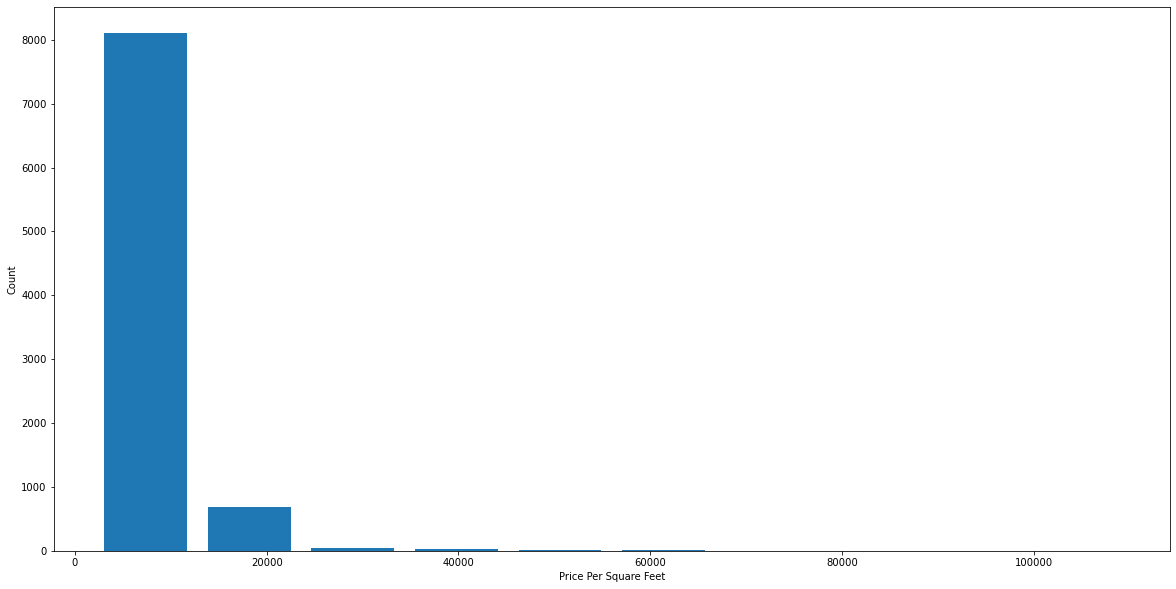

In [27]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(dataset2['Price Per Sq.ft'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [28]:
dataset2[dataset2['Price Per Sq.ft']>40000].shape

(35, 8)

In [29]:
dataset3 = dataset2[~(dataset2['Price Per Sq.ft']>40000)]

In [30]:
dataset3.shape

(8858, 8)

Text(0, 0.5, 'Count')

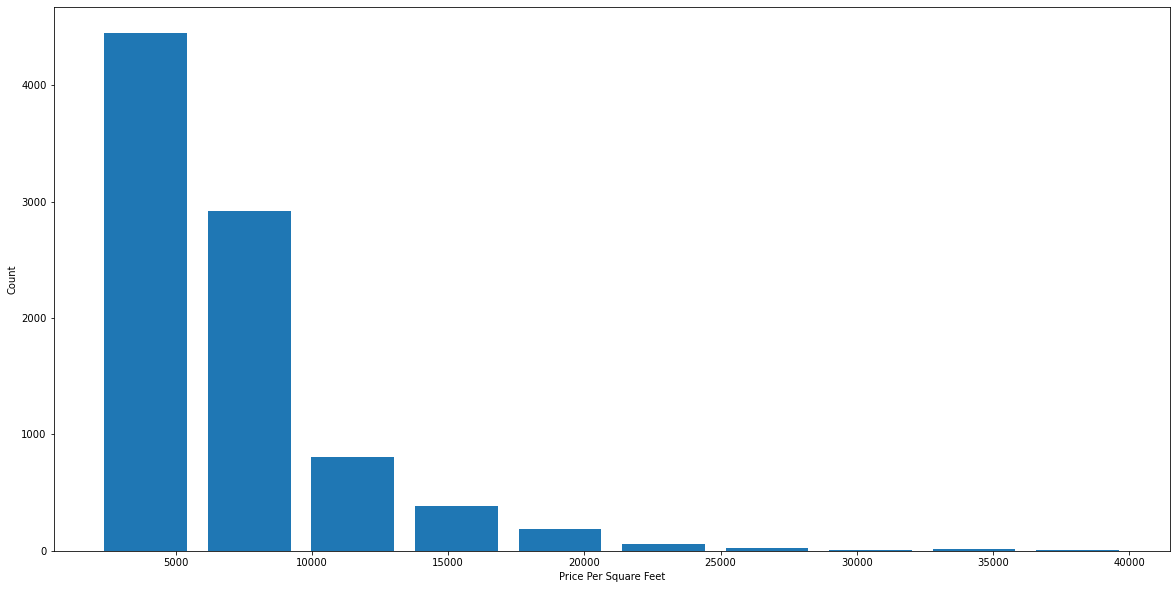

In [31]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(dataset3['Price Per Sq.ft'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [32]:
dataset3.drop(['Price Per Sq.ft','Latitude','Longitude'], axis='columns')

,Price,Area,Location,BHK,City
0,300.00,3340,Others,4,Banglore
1,83.58,1675,Doddanekundi,3,Banglore
2,68.45,1670,Others,3,Banglore
3,67.97,1220,Horamavu,2,Banglore
4,200.00,2502,Thanisandra,4,Banglore
...,...,...,...,...,...
9384,33.00,670,Others,1,Mumbai
9386,25.00,540,Others,1,Mumbai
9387,190.00,1267,Others,3,Mumbai
9388,149.00,1245,Others,2,Mumbai


In [34]:
dummies = pd.get_dummies(dataset3.Location)
dummies.head()

,Alaknanda,Alwal,Ambattur,Aminpur,Anjanapura,Anna Nagar,Appa Junction,Attapur,Attibele,Avadi,...,Velachery,Vengaivasal,Wadala,Wadala East Wadala,West Marredpally,West Tambaram,Whitefield Hope Farm Junction,Yelahanka,nawada,tambaram west
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
dataset4 = pd.concat([dataset3, dummies.drop('tambaram west', axis = 'columns')], axis='columns')
dataset4.head()

,Price,Area,Location,BHK,City,Latitude,Longitude,Price Per Sq.ft,Alaknanda,Alwal,...,Vasant Kunj,Velachery,Vengaivasal,Wadala,Wadala East Wadala,West Marredpally,West Tambaram,Whitefield Hope Farm Junction,Yelahanka,nawada
0,300.00,3340,Others,4,Banglore,12.265594,76.646540,8982.035928,0,0,...,0,0,0,0,0,0,0,0,0,0
1,83.58,1675,Doddanekundi,3,Banglore,12.971319,77.696477,4989.850746,0,0,...,0,0,0,0,0,0,0,0,0,0
2,68.45,1670,Others,3,Banglore,12.917657,77.483757,4098.802395,0,0,...,0,0,0,0,0,0,0,0,0,0
3,67.97,1220,Horamavu,2,Banglore,13.027331,77.660151,5571.311475,0,0,...,0,0,0,0,0,0,0,0,0,0
4,200.00,2502,Thanisandra,4,Banglore,13.054713,77.633926,7993.605116,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
dataset5 = dataset4.drop(['Location','Latitude','Longitude','Price Per Sq.ft'], axis='columns')
dataset5.head(3)

,Price,Area,BHK,City,Alaknanda,Alwal,Ambattur,Aminpur,Anjanapura,Anna Nagar,...,Vasant Kunj,Velachery,Vengaivasal,Wadala,Wadala East Wadala,West Marredpally,West Tambaram,Whitefield Hope Farm Junction,Yelahanka,nawada
0,300.00,3340,4,Banglore,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,83.58,1675,3,Banglore,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,68.45,1670,3,Banglore,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
dataset5.shape

(8858, 216)

In [42]:
dummies2 = pd.get_dummies(dataset5.City)
dummies2.head()

,Banglore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [43]:
dataset6 = pd.concat([dataset5, dummies2.drop('Mumbai', axis = 'columns')], axis='columns')
dataset6.head()

,Price,Area,BHK,City,Alaknanda,Alwal,Ambattur,Aminpur,Anjanapura,Anna Nagar,...,West Marredpally,West Tambaram,Whitefield Hope Farm Junction,Yelahanka,nawada,Banglore,Chennai,Delhi,Hyderabad,Kolkata
0,300.00,3340,4,Banglore,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,83.58,1675,3,Banglore,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,68.45,1670,3,Banglore,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,67.97,1220,2,Banglore,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,200.00,2502,4,Banglore,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
dataset7 = dataset6.drop(['City'], axis = 'columns')
dataset7.head()

,Price,Area,BHK,Alaknanda,Alwal,Ambattur,Aminpur,Anjanapura,Anna Nagar,Appa Junction,...,West Marredpally,West Tambaram,Whitefield Hope Farm Junction,Yelahanka,nawada,Banglore,Chennai,Delhi,Hyderabad,Kolkata
0,300.00,3340,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,83.58,1675,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,68.45,1670,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,67.97,1220,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,200.00,2502,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
X = dataset7.drop('Price', axis='columns')
X.head()

,Area,BHK,Alaknanda,Alwal,Ambattur,Aminpur,Anjanapura,Anna Nagar,Appa Junction,Attapur,...,West Marredpally,West Tambaram,Whitefield Hope Farm Junction,Yelahanka,nawada,Banglore,Chennai,Delhi,Hyderabad,Kolkata
0,3340,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1675,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1670,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1220,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2502,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
y = dataset7.Price
y.head()

0    300.00
1     83.58
2     68.45
3     67.97
4    200.00
Name: Price, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [49]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7949793075026013

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.7628994 , 0.78067335, 0.75787084, 0.73560747, 0.77739069])

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_the_GridSearchCV(X,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [57]:
find_best_model_using_the_GridSearchCV(X,y)

,model,best_score,best_params
0,linear_regression,0.762888,{'normalize': False}
1,lasso,0.672906,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.779331,"{'criterion': 'mse', 'splitter': 'random'}"


In [58]:
def predict_price(Location, Area, BHK):
    loc_index = np.where(X.columns == Location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = Area
    x[1] = BHK
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [64]:
X.columns

Index(['Area', 'BHK', 'Alaknanda', 'Alwal', 'Ambattur', 'Aminpur',
       'Anjanapura', 'Anna Nagar', 'Appa Junction', 'Attapur',
       ...
       'West Marredpally', 'West Tambaram', 'Whitefield Hope Farm Junction',
       'Yelahanka', 'nawada', 'Banglore', 'Chennai', 'Delhi', 'Hyderabad',
       'Kolkata'],
      dtype='object', length=219)

In [61]:
predict_price('Doddanekundi', 1500, 3)

163.02755837002275

In [62]:
predict_price('Aminpur', 1500, 3)

200.06061853078836

In [68]:
predict_price('Uttam Nagar', 500, 2)

35.97127186034942

In [76]:
import pickle
with open('Metropolitan_Cities_home_prices_prediction_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [77]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))